## Observations and Insights 

In [583]:
%matplotlib notebook

In [584]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [585]:
# Importing data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [586]:
# Read the mouse data and  results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [587]:
#nRead the study datafile
study_results_df = pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [588]:
mouse_metadata_df.shape

(249, 5)

In [589]:
mouse_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [590]:
study_results_df.shape

(1893, 4)

In [591]:
study_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [592]:
len(study_results_df['Mouse ID'].unique())

249

In [593]:
# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata_df, study_results_df, how="outer", on=["Mouse ID"])
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [594]:
merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [595]:
merged_data_df.groupby(['Mouse ID', 'Timepoint']).sum()

Age_months  Weight (g)  Tumor Volume (mm3)  \
Mouse ID Timepoint                                               
a203     0                  20          23           45.000000   
         5                  20          23           48.508468   
         10                 20          23           51.852437   
         15                 20          23           52.777870   
         20                 20          23           55.173336   
...                        ...         ...                 ...   
z969     25                  9          30           63.145652   
         30                  9          30           65.841013   
         35                  9          30           69.176246   
         40                  9          30           70.314904   
         45                  9          30           73.867845   

                    Metastatic Sites  
Mouse ID Timepoint                    
a203     0                         0  
         5                         0  
         10                        1  
         15                        1  
         20                        1  
...                              ...  
z969     25                        2  
         30                        3  
         35                        4  
         40                        4  
         45                        4  

[1888 rows x 4 columns]

In [596]:
merged_data_df.duplicated(subset=['Mouse ID','Timepoint']).sum()

5

In [597]:
(~merged_data_df.duplicated(subset=['Mouse ID','Timepoint'])).sum()

1888

In [598]:
merged_data_df[merged_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [599]:
# Extract duplicate rows
merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [600]:
cleaned_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [601]:
len(cleaned_df['Mouse ID'].unique())

249

In [602]:
cleaned_df.shape

(1883, 8)

In [603]:
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1883 non-null   object 
 1   Drug Regimen        1883 non-null   object 
 2   Sex                 1883 non-null   object 
 3   Age_months          1883 non-null   int64  
 4   Weight (g)          1883 non-null   int64  
 5   Timepoint           1883 non-null   int64  
 6   Tumor Volume (mm3)  1883 non-null   float64
 7   Metastatic Sites    1883 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.4+ KB


In [604]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [605]:
cleaned_df[cleaned_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [606]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

In [607]:
# Group by mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
stat_group_df = cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
print(stat_group_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


In [608]:
# rename columns
stat_group_df.columns = ['Tumor_Volume_mean', 'Tumor_Volume_median', 'Tumor_Volume_var', 'Tumor_Volume_Std.Dev', 'Tumor_Volume_Std.Err']
print(stat_group_df)

              Tumor_Volume_mean  Tumor_Volume_median  Tumor_Volume_var  \
Drug Regimen                                                             
Capomulin             40.675741            41.557809         24.947764   
Ceftamin              52.591172            51.776157         39.290177   
Infubinol             52.884795            51.820584         43.128684   
Ketapril              55.235638            53.698743         68.553577   
Naftisol              54.331565            52.509285         66.173479   
Placebo               54.033581            52.288934         61.168083   
Propriva              52.458254            50.854632         44.053659   
Ramicane              40.216745            40.673236         23.486704   
Stelasyn              54.233149            52.431737         59.450562   
Zoniferol             53.236507            51.818479         48.533355   

              Tumor_Volume_Std.Dev  Tumor_Volume_Std.Err  
Drug Regimen                                        

## Bar and Pie Charts

In [609]:
# Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows  the number of total mice for each treatment regimen throughout the course of the study.


In [610]:
# Generating a bar plot using Matplotlib's `pyplot` 
count_df = cleaned_df.groupby(['Drug Regimen']).agg({'Mouse ID': ['count']})
print(count_df)

             Mouse ID
                count
Drug Regimen         
Capomulin         230
Ceftamin          178
Infubinol         178
Ketapril          188
Naftisol          186
Placebo           181
Propriva          151
Ramicane          228
Stelasyn          181
Zoniferol         182


In [611]:
# rename columns
count_df.columns = ['Mice_Count']
count_df

,Mice_Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


In [612]:
# Sorting the data in descending order
count_df = count_df.sort_values('Mice_Count', ascending=False)

In [613]:
count_df

,Mice_Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


In [614]:
# Create an array that contains the number of total mouse for  each treatment regimen throughout the course of the study.
mice_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 151]
x_axis = np.arange(len(mice_count))

<IPython.core.display.Javascript object>


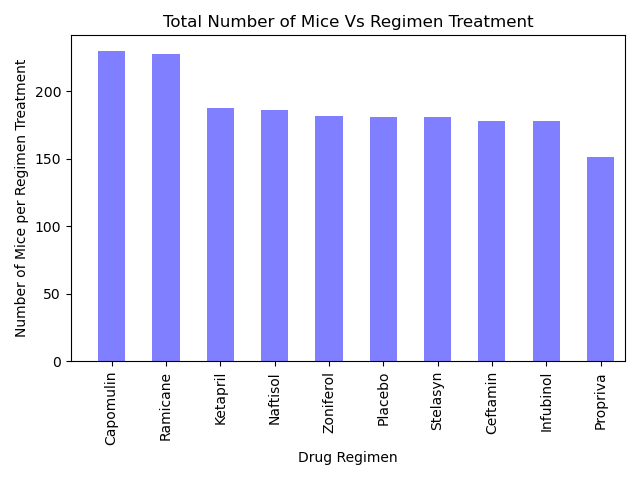

<BarContainer object of 10 artists>

In [615]:
# Telling matplotlib that we will be making a bar chart
# mouse_count is our y axis and x_axis is the length of x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, mice_count, color='b', alpha=0.5, align="center", width = 0.5)

In [616]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"])

([<matplotlib.axis.XTick at 0x2069462cbe0>,
 [Text(-2.0, 0, 'Capomulin'),
  Text(0.0, 0, 'Ramicane'),
  Text(2.0, 0, 'Ketapril'),
  Text(4.0, 0, 'Naftisol'),
  Text(6.0, 0, 'Zoniferol'),
  Text(8.0, 0, 'Placebo'),
  Text(10.0, 0, 'Stelasyn'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Propriva')])

In [617]:
plt.tick_params(axis='x', labelrotation = 90)

In [618]:
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.55)

(-0.75, 9.45)

In [619]:
# Give our chart some labels and a tile
plt.title("Total Number of Mice Vs Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Regimen Treatment")

Text(38.097222222222214, 0.5, 'Number of Mice per Regimen Treatment')

In [620]:
plt.tight_layout()
plt.show()

In [621]:
# Generating identical bar plot using Pandas's `DataFrame.plot()`
# Generating a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There is a single bar per regimen



In [622]:
count_df

,Mice_Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


<IPython.core.display.Javascript object>


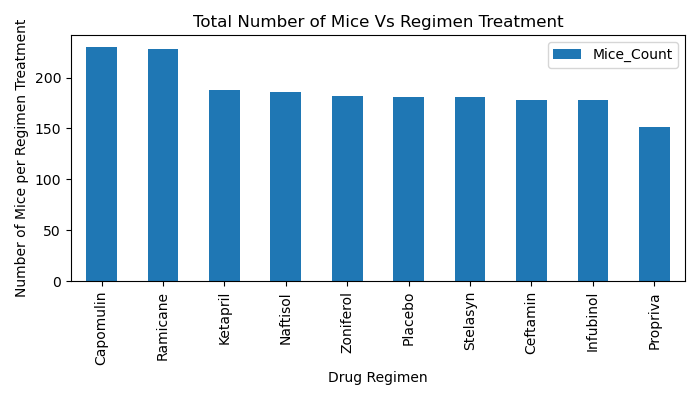

In [623]:
# Use DataFrame.plot() in order to create a bar chart of the data
count_df.plot(kind="bar", figsize=(7,4))

# Give our chart some labels and a tile
plt.title("Total Number of Mice Vs Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Regimen Treatment")
plt.show()
plt.tight_layout()

In [624]:
# Generate a pie plot showing the distribution of female versus male mice using 'Matplotlibs pyplot'
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [625]:
gender_group_df = cleaned_df.groupby(['Sex']).agg({'Sex': ['count']})

print(gender_group_df)

         Sex
       count
Sex         
Female   925
Male     958


In [626]:
# rename columns
gender_group_df.columns = ['Sex']
gender_group_df

,Sex
Sex,
Female,925
Male,958


In [627]:
%matplotlib notebook

In [628]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

In [629]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
distribution = [925, 958]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

<IPython.core.display.Javascript object>


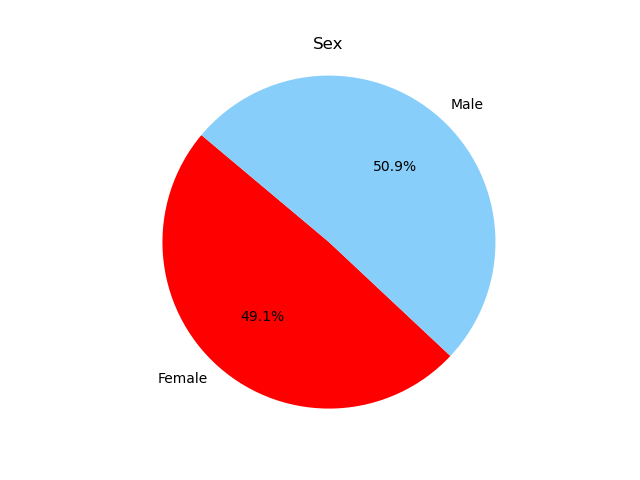

In [630]:
plt.title("Sex")
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(distribution, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.show()

In [631]:
#Pie plot using Pandas

<IPython.core.display.Javascript object>


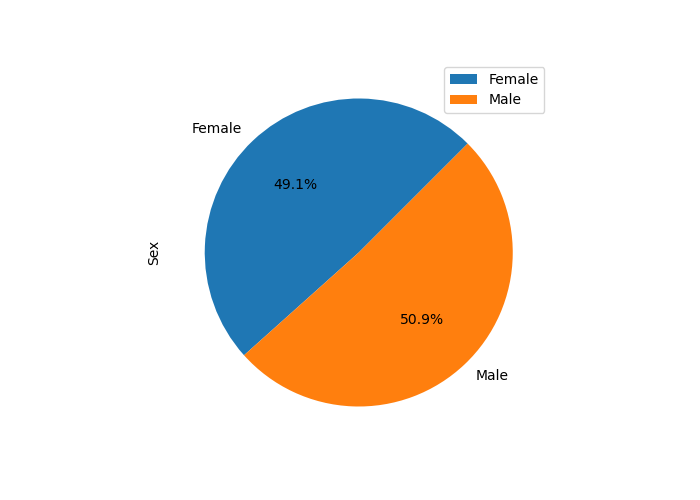

In [632]:
gender_group_df.plot(kind='pie', y='Sex', subplots=False, shadow = False, startangle=45,
figsize=(7,5), autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [633]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [634]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [635]:
# Collect a list of columns 
columns = [
    "Mouse ID",
    "Drug Regimen",
    "Sex",
    "Timepoint",
    "Tumor Volume (mm3)"
]


# Steps for "Capomulin" group:
# Filter the data so that only "Capomulin" in the 'Drug Regimen' are in a DataFrame
capomulin_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", columns]
capomulin_group_df

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,Female,0,45.000000
11,s185,Capomulin,Female,5,43.878496
12,s185,Capomulin,Female,10,37.614948
13,s185,Capomulin,Female,15,38.177232
14,s185,Capomulin,Female,20,36.866876
...,...,...,...,...,...
440,i557,Capomulin,Female,45,47.685963
1452,r157,Capomulin,Male,0,45.000000
1453,r157,Capomulin,Male,5,45.597064
1454,r157,Capomulin,Male,10,46.059608


In [636]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Capomulin' regimen
df1 = capomulin_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
df1

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
b128     37.967644                 35
         38.379726                 40
         38.982878                 45
         40.605335                 30
         42.731552                 20
...                               ...
y793     40.716428                 20
         41.019913                  5
         41.630010                 10
         42.283665                 15
         45.000000                  0

[230 rows x 1 columns]

In [637]:
# rename columns
df1.columns = ['Timepoint']
df1.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
b128     37.967644                  35
         38.379726                  40
         38.982878                  45
         40.605335                  30
         42.731552                  20

In [638]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
df1 = df1.groupby('Mouse ID').Timepoint.idxmax().str[-1]
df1.head()

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
Name: Timepoint, dtype: float64

In [639]:
# Converting into a DataFrame
df1 = pd.DataFrame(df1)
df1.head()

,Timepoint
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220


In [640]:
# rename columns
df1.columns = ['Final Tumor Volume (mm3)']
df1.head()

,Final Tumor Volume (mm3)
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220


In [641]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
df1 = df1.sort_values('Final Tumor Volume (mm3)', ascending=True)
df1.head()

,Final Tumor Volume (mm3)
Mouse ID,
s185,23.343598
m601,28.430964
x401,28.484033
f966,30.485985
u364,31.023923


In [642]:
# Assigning the dataframe column to a list
a_list = df1['Final Tumor Volume (mm3)'].tolist()
a_list

[23.34359787,
 28.43096411,
 28.48403281,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 36.04104736,
 37.07402422,
 37.31184577,
 38.125164399999996,
 38.75326548,
 38.84687569,
 38.93963263,
 38.98287774,
 39.95234669,
 40.1592203,
 40.65812366,
 40.72857787,
 41.48300765,
 41.58152074,
 46.53920617,
 47.68596303]

In [643]:
# Steps for "Ramicane" group:
# Filter the data so that only "Ramicane" in the 'Drug Regimen' are in a DataFrame
ramicane_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", columns]
ramicane_group_df.head()

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,0,45.000000
1,k403,Ramicane,Male,5,38.825898
2,k403,Ramicane,Male,10,35.014271
3,k403,Ramicane,Male,15,34.223992
4,k403,Ramicane,Male,20,32.997729


In [644]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Ramicane' regimen
df2 = ramicane_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
df2

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
a411     38.087373                 20
         38.407618                 45
         38.701438                 25
         39.130737                 30
         39.717236                 35
...                               ...
z578     38.504824                 35
         38.688516                 15
         42.188787                  5
         42.952118                 10
         45.000000                  0

[228 rows x 1 columns]

In [645]:
# rename columns
df2.columns = ['Timepoint']
df2.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
a411     38.087373                  20
         38.407618                  45
         38.701438                  25
         39.130737                  30
         39.717236                  35

In [646]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
df2 = df2.groupby('Mouse ID').Timepoint.idxmax().str[-1]
df2.head()

Mouse ID
a411    38.407618
a444    43.047543
a520    38.810366
a644    32.978522
c458    38.342008
Name: Timepoint, dtype: float64

In [647]:
# Converting into a DataFrame
df2 = pd.DataFrame(df2)
df2.head()

,Timepoint
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008


In [648]:
# rename columns
df2.columns = ['Final Tumor Volume (mm3)']
df2.head()

,Final Tumor Volume (mm3)
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008


In [649]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
df2 = df2.sort_values('Final Tumor Volume (mm3)', ascending=True)
df2.head()

,Final Tumor Volume (mm3)
Mouse ID,
k403,22.050126
g791,29.128472
s508,30.276232
m546,30.564625
z578,30.638696


In [650]:
# Assigning the dataframe column to a list
b_list = df2['Final Tumor Volume (mm3)'].tolist()
b_list

[22.05012627,
 29.12847181,
 30.27623175,
 30.56462509,
 30.63869575,
 31.09533505,
 31.56046955,
 32.97852192,
 33.39765251,
 33.56240217,
 36.13485243,
 36.37451039,
 36.56165229,
 37.22565033,
 37.31123552,
 38.34200823,
 38.407618299999996,
 38.81036633,
 40.65900627,
 40.66771292,
 43.04754260000001,
 43.16637266,
 43.41938077,
 44.18345092,
 45.22086888]

In [651]:
# Steps for "Infubinol" group:
# Filter the data so that only "Infubinol" in the 'Drug Regimen' are in a DataFrame
infubinol_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", columns]
infubinol_group_df.head()

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
454,a203,Infubinol,Female,0,45.000000
455,a203,Infubinol,Female,5,48.508468
456,a203,Infubinol,Female,10,51.852437
457,a203,Infubinol,Female,15,52.777870
458,a203,Infubinol,Female,20,55.173336


In [652]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Infubinol' regimen
df3 = infubinol_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
df3.head()

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
a203     45.000000                  0
         48.508468                  5
         51.852437                 10
         52.777870                 15
         55.173336                 20

In [653]:
# rename columns
df3.columns = ['Timepoint']
df3.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
a203     45.000000                   0
         48.508468                   5
         51.852437                  10
         52.777870                  15
         55.173336                  20

In [654]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
df3 = df3.groupby('Mouse ID').Timepoint.idxmax().str[-1]
df3.head()

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
Name: Timepoint, dtype: float64

In [655]:
# Converting into a DataFrame
df3 = pd.DataFrame(df3)
df3.head()

,Timepoint
Mouse ID,
a203,67.973419
a251,65.525743
a577,57.031862
a685,66.083066
c139,72.226731


In [656]:
# rename columns
df3.columns = ['Final Tumor Volume (mm3)']
df3.head()

,Final Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a577,57.031862
a685,66.083066
c139,72.226731


In [657]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
df3 = df3.sort_values('Final Tumor Volume (mm3)', ascending=True)
df3.head()

,Final Tumor Volume (mm3)
Mouse ID,
c326,36.321346
o813,45.699331
v339,46.250112
m756,47.010364
w193,50.005138


In [658]:
# Assigning the dataframe column to a list
c_list = df3['Final Tumor Volume (mm3)'].tolist()
c_list

[36.321345799999996,
 45.69933088,
 46.25011212,
 47.01036401,
 50.00513807,
 51.54243058,
 54.04860769,
 54.65654872,
 55.62942846,
 55.65068132,
 57.03186187,
 58.26844248,
 60.16518046,
 60.91876652,
 60.96971133,
 62.11727887,
 62.43540402,
 62.75445141,
 65.52574285,
 66.08306589,
 66.19691151,
 67.28962147,
 67.68556862,
 67.97341878,
 72.2267309]

In [659]:
# Steps for "Ceftamin" group:
# Filter the data so that only "Ceftamin" in the 'Drug Regimen' are in a DataFrame
ceftamin_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", columns]
ceftamin_group_df.head()

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
484,a275,Ceftamin,Female,0,45.000000
485,a275,Ceftamin,Female,5,46.795257
486,a275,Ceftamin,Female,10,47.371343
487,a275,Ceftamin,Female,15,49.734404
488,a275,Ceftamin,Female,20,50.513437


In [660]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Ceftamin' regimen
df4 = ceftamin_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
df4.head()

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
a275     45.000000                  0
         46.795257                  5
         47.371343                 10
         49.734404                 15
         50.513437                 20

In [661]:
# rename columns
df4.columns = ['Timepoint']
df4.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
a275     45.000000                   0
         46.795257                   5
         47.371343                  10
         49.734404                  15
         50.513437                  20

In [662]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
df4 = df4.groupby('Mouse ID').Timepoint.idxmax().str[-1]
df4.head()

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
Name: Timepoint, dtype: float64

In [663]:
# Converting into a DataFrame
df4 = pd.DataFrame(df4)
df4.head()

,Timepoint
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078


In [664]:
# rename columns
df4.columns = ['Final Tumor Volume (mm3)']
df4.head()

,Final Tumor Volume (mm3)
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078


In [665]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
df4 = df4.sort_values('Final Tumor Volume (mm3)', ascending=True)
df4.head()

,Final Tumor Volume (mm3)
Mouse ID,
x226,45.000000
b447,45.000000
u153,45.000000
t573,45.000000
l558,46.784535


In [666]:
# Assigning the dataframe column to a list
d_list = df4['Final Tumor Volume (mm3)'].tolist()
d_list

[45.0,
 45.0,
 45.0,
 45.0,
 46.78453491,
 47.784681799999994,
 48.72207785,
 52.92534846,
 55.74282869,
 56.05774909,
 57.91838132,
 59.74190064,
 59.85195552,
 61.38666032,
 61.43389223,
 61.84902336,
 62.99935619,
 64.19234114,
 64.29983003,
 64.63494887,
 64.72983655,
 67.52748237,
 67.74866174,
 68.59474498,
 68.92318457]

In [667]:
#final_volume_list4 = []

#for x in range(len(a_list)):
    #final_volume_list4.append(a_list[x])
#print(final_volume_list4)

In [668]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [669]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [670]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


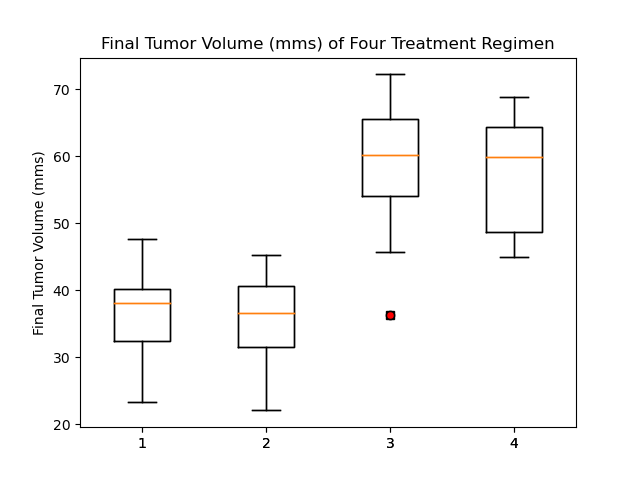

In [671]:
data = [a_list, b_list, c_list, d_list]

red_square = dict(markerfacecolor='r', marker='s')

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume (mms) of Four Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mms)')
ax.boxplot(data, flierprops=red_square)
ax.boxplot(data)
plt.show()

In [672]:
np.quantile(a_list, .25)

32.37735684

In [673]:
# Determine if there are any potential outliers in the 'Final Tumor Volume (mm3)' data
quartiles = final_volume_list4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



AttributeError: 'list' object has no attribute 'quantile'

In [674]:
outlier_df = df4.loc[(df4['Final Tumor Volume (mm3)'] < lower_bound) | (df4['Final Tumor Volume (mm3)'] > upper_bound)]


In [675]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [676]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [677]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [678]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [679]:
# Collect a list of columns 
columns = [
    "Mouse ID",
    "Timepoint",
    "Tumor Volume (mm3)"
]


# Filter the data so that only "Capomulin" in the 'Drug Regimen' are in a DataFrame
capomulinl509_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "l509"), columns]
capomulinl509_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
371,l509,0,45.000000
372,l509,5,45.851193
373,l509,10,46.759074
374,l509,15,47.488599
375,l509,20,48.070452
376,l509,25,44.006257
377,l509,30,44.708055
378,l509,35,40.207289
379,l509,40,40.770813
380,l509,45,41.483008


<IPython.core.display.Javascript object>


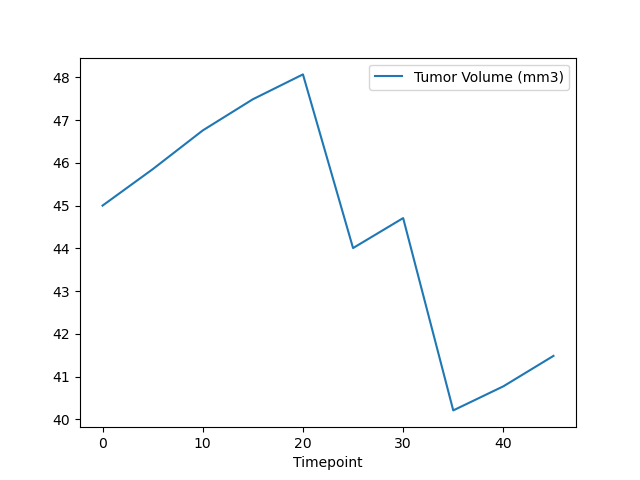

In [680]:
lines = capomulinl509_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

In [681]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [682]:
# Collect a list of columns 
columns = [
    "Mouse ID",
    "Drug Regimen",
    "Weight (g)",
    "Timepoint",
    "Tumor Volume (mm3)"
]

# Steps for "Capomulin" group:
# Filter the data so that only "Capomulin" in the 'Drug Regimen' are in a DataFrame
capomulin_df1 = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", columns]
capomulin_df1.head()

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,17,0,45.000000
11,s185,Capomulin,17,5,43.878496
12,s185,Capomulin,17,10,37.614948
13,s185,Capomulin,17,15,38.177232
14,s185,Capomulin,17,20,36.866876


In [718]:
avg_volume_df = capomulin_df1.groupby(["Mouse ID", "Weight (g)"]).agg({"Tumor Volume (mm3)": ['mean']})
avg_volume_df.head()

,,Tumor Volume (mm3)
,,mean
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [719]:
# rename columns
avg_volume_df.columns = ['Average Tumor Volume (mm3)']
avg_volume_df.head()

,,Average Tumor Volume (mm3)
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [728]:
#avg_volume_df = avg_volume_df.reset_index()

#Converting Weight into a DataFrame
avg_volume_df = pd.DataFrame(avg_volume_df)
#avg_volume_df.head()

In [729]:
id_list = avg_volume_df['Mouse ID'].tolist()
weight_list = avg_volume_df['Weight (g)'].tolist()
average_list = avg_volume_df['Average Tumor Volume (mm3)'].tolist()


In [730]:
%matplotlib notebook

In [731]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


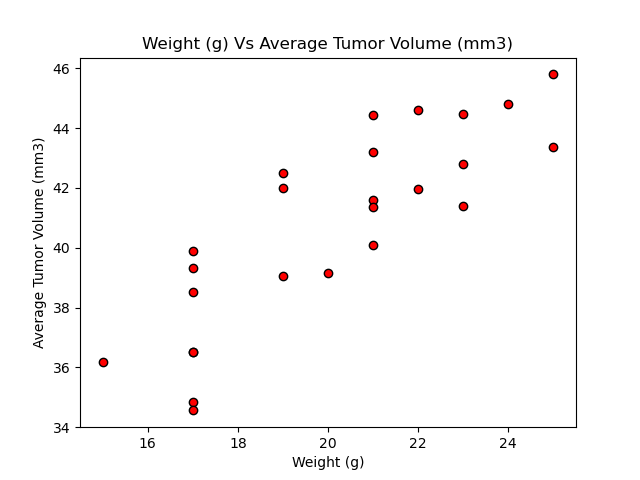

In [732]:
plt.scatter(weight_list, average_list, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Weight (g) Vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights